<a href="https://colab.research.google.com/github/brenda1602/DL_TensorFlow/blob/master/Convolucionais_7_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
tf.__version__


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0'

In [ ]:
fashion_train_df=pd.read_csv('/content/drive/My Drive/fashion-mnist-train.csv', sep= ',')
fashion_test_df=pd.read_csv('/content/drive/My Drive/fashion-mnist-test.csv', sep= ',')

In [ ]:
training=np.array(fashion_train_df,dtype= 'float32')
testing=np.array(fashion_test_df,dtype= 'float32')

In [ ]:
training.shape

(60000, 785)

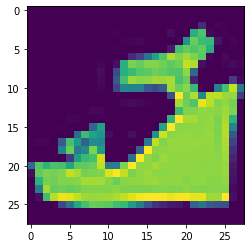

In [ ]:
i= random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))

In [ ]:
label=training[i,0]
label

5.0

In [ ]:
x_train=training[:,1:]/255
y_train=training[:,0]

In [ ]:
x_test=testing[:,1:]/255
y_test=testing[:,0]

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
from tensorflow.keras import layers,models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64,activation='relu'))

cnn.add(layers.Dense(10,activation='softmax'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])


In [ ]:
epochs=150
history=cnn.fit(x_train,y_train,batch_size=512,epochs=epochs)

Epoch 1/150
118/118 [==============================] - 43s 363ms/step - loss: 0.8822 - accuracy: 0.6809
Epoch 2/150
118/118 [==============================] - 43s 367ms/step - loss: 0.5057 - accuracy: 0.8143
Epoch 3/150
118/118 [==============================] - 44s 370ms/step - loss: 0.4210 - accuracy: 0.8488
Epoch 4/150
118/118 [==============================] - 43s 366ms/step - loss: 0.3777 - accuracy: 0.8630
Epoch 5/150
118/118 [==============================] - 43s 365ms/step - loss: 0.3490 - accuracy: 0.8744
Epoch 6/150
118/118 [==============================] - 43s 366ms/step - loss: 0.3227 - accuracy: 0.8848
Epoch 7/150
118/118 [==============================] - 43s 364ms/step - loss: 0.3140 - accuracy: 0.8875
Epoch 8/150
118/118 [==============================] - 46s 391ms/step - loss: 0.2934 - accuracy: 0.8948
Epoch 9/150
118/118 [==============================] - 43s 365ms/step - loss: 0.2805 - accuracy: 0.8995
Epoch 10/150
118/118 [==============================] - 43s 362m